#ΣΤΥΛΙΑΝΟΣ ΨΑΡΑ 1115201800226

#ΕΡΩΤΗΜΑ 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,w):
  fx = 1/(1+np.exp(-w*x))
  return(fx)

x = np.array(range(-10, 10))

Text(0.5, 1.0, 'W = 1')

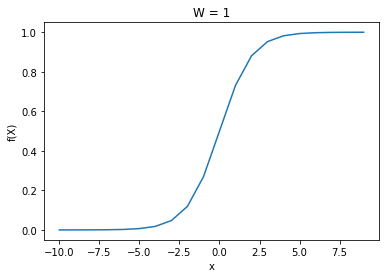

In [ ]:
#W = 1
fx = f(x,1)

plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('f(X)')
plt.title('W = 1')

Text(0.5, 1.0, 'W = 5')

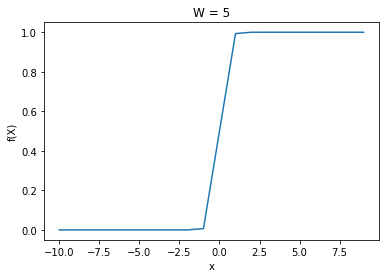

In [ ]:
#W = 5
fx = f(x,5)

plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('f(X)')
plt.title('W = 5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Text(0.5, 1.0, 'W = 100')

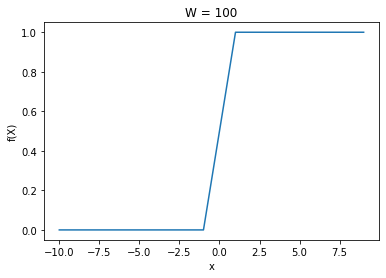

In [ ]:
#W = 100
fx = f(x,100)

plt.plot(x, fx)
plt.xlabel('x')
plt.ylabel('f(X)')
plt.title('W = 100')

Λόγω του ότι στην λογιστική παλινδρόμηση επιθυμούμε η έξοδος του ταξινομητή να εκφράζει πιθανότητα χρησιμοποιούμε την sigmoid function η οποία επιστρέφει τιμές από 0 μέχρι 1 και λόγω της μορφής της όσο αυξάνεται το w τοσο ποιο κοντά στο 1 και σε overfiting  φτάνει η f(x). Για αυτό τον λόγω χρειάζεται να χρησιμοποιήσουμε ένα κανονικοποιητή ο οποίος θα κάνει train το μοντέλο χωρίς να χρειαστεί να χρησιμοποιήσει μεγάλο βάρος παλινδρόμησης w

#ΕΡΩΤΗΜΑ 2

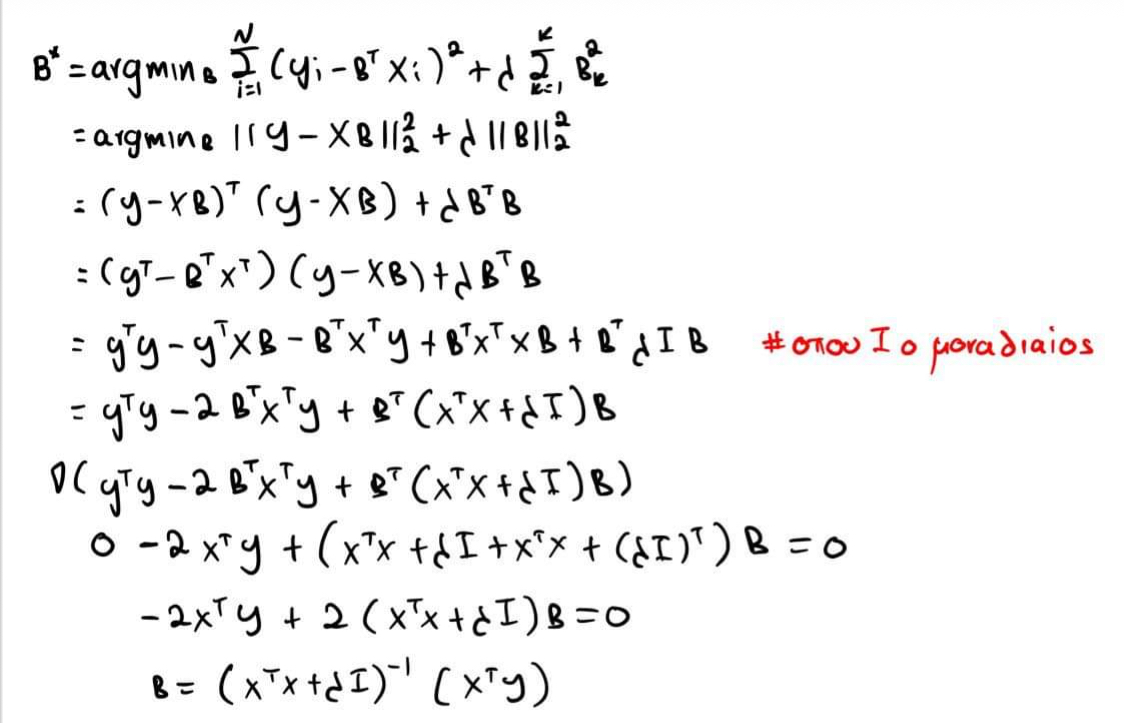

#ΕΡΩΤΗΜΑ 3

##CREATE SETS

In [ ]:
import os
os.mkdir('/content/images') 
os.mkdir('/content/images/Set_1')
os.mkdir('/content/images/Set_2')
os.mkdir('/content/images/Set_3')
os.mkdir('/content/images/Set_4')
os.mkdir('/content/images/Set_5')

In [ ]:
import shutil
import os

os.chdir('/content/faces')
cnt = 1
for img in sorted(os.listdir()):
    if cnt == 65:
      cnt = 1
    if cnt <= 7:
      shutil.copy(img, "/content/images/Set_1")
    elif cnt <= 19:
      shutil.copy(img, "/content/images/Set_2")
    elif cnt <= 31:
      shutil.copy(img, "/content/images/Set_3")
    elif cnt <= 45:
      shutil.copy(img, "/content/images/Set_4")
    else:
      shutil.copy(img, "/content/images/Set_5")
    cnt+=1

##ΖΗΤΟΥΜΕΝΟ Ι

In [ ]:
from PIL import Image
import numpy as np
import re

def loadImages(path, set_number):

  full_path = path+'/'+set_number

  data_array = empty_array = np.empty((2500, 0), float)
  labels = []
  
  for img in os.listdir(full_path):
  
    labels.append(re.search(r'\d+', img).group()) 

    current_img = Image.open(img)
    image_data = current_img.getdata()
    image_array = np.array(image_data).reshape(1,2500)
    image_array = image_array - np.mean(image_array)
    image_array = image_array/np.std(image_array, dtype = np.float32)

    data_array = np.append(data_array, image_array.transpose(), axis = 1)
    
  
  

  return np.array(labels), data_array






##ZHTOYMENO II

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

path = '/content/images'

for n_components in (9,30):
  print("\nn_components =",n_components )
  print("--------------------")
  set_number = 'Set_1'
  y_train, x_train = loadImages(path,set_number)
  
  pca = PCA(n_components=n_components).fit(x_train.transpose())
  if n_components == 9:
    pca_9 = pca
  else:
    pca_30 = pca

  x_train_pca = pca.transform(x_train.transpose())

  classifier = KNeighborsClassifier(n_neighbors = 1, p = 2).fit(x_train_pca, y_train)

  y_pred = classifier.predict(x_train_pca)

  print("Accuracy for",set_number," : ",metrics.accuracy_score(y_train, y_pred))

  Sets = [ "Set_2","Set_3","Set_4","Set_5"]
  for set_number in Sets:
    y_true, x_test = loadImages(path,set_number)
    x_test_pca = pca.transform(x_test.transpose())
    y_pred = classifier.predict(x_test_pca)
  
    print("Accuracy for",set_number," : ",metrics.accuracy_score(y_true, y_pred))



n_components = 9
--------------------
Accuracy for Set_1  :  1.0
Accuracy for Set_2  :  1.0
Accuracy for Set_3  :  0.775
Accuracy for Set_4  :  0.3357142857142857
Accuracy for Set_5  :  0.14210526315789473

n_components = 30
--------------------
Accuracy for Set_1  :  1.0
Accuracy for Set_2  :  1.0
Accuracy for Set_3  :  0.9583333333333334
Accuracy for Set_4  :  0.4357142857142857
Accuracy for Set_5  :  0.22631578947368422


##ΖΗΤΟΥΜΕΝΟ ΙΙΙ

In [ ]:
plt.figure(figsize=(18, 8))
for i in range(0,9,1):
  plt.subplot(3, 3, i+1)
  plt.imshow(pca_9.components_[i].reshape(50, 50), cmap='bone')



NameError: ignored

##ΖΗΤΟΥΜΕΝΟ ΙV

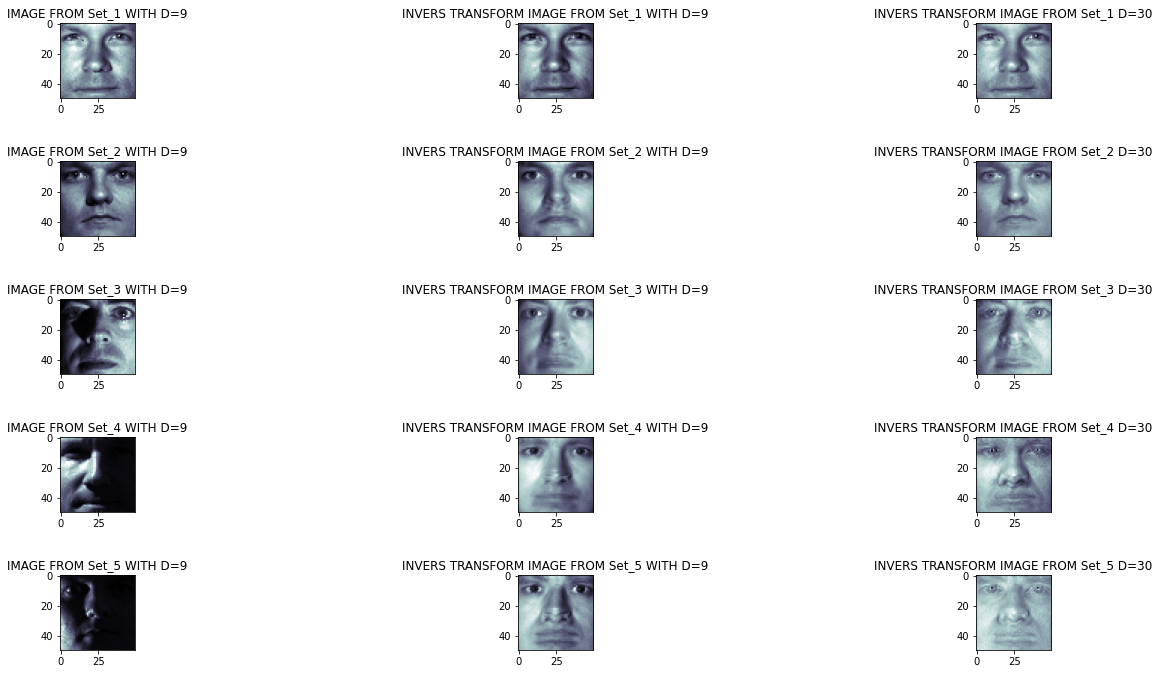

In [ ]:
import random

plt.figure(figsize=(20, 10))
i = 0
Sets = ["Set_1","Set_2","Set_3","Set_4","Set_5"]
for set_number in Sets:

  label, image_data = loadImages(path,set_number)
  image_data = image_data.transpose()
  num_of_imgs = image_data.shape[0]
  rand = random.randint(0, num_of_imgs-1)

  i+=1
  plt.subplot(5, 3, i)
  plt.title("IMAGE FROM %s WITH D=9" %set_number)
  plt.imshow(image_data[rand].reshape(50, 50), cmap='bone')
 
  image_data_pca_9 = pca_9.transform(image_data)
  inv_tran_img_pca_9 = pca_9.inverse_transform(image_data_pca_9)

  i+=1
  plt.subplot(5, 3, i)
  plt.title("INVERS TRANSFORM IMAGE FROM %s WITH D=9"%set_number)
  plt.imshow(inv_tran_img_pca_9[rand].reshape(50, 50), cmap='bone')

  image_data_pca_30 = pca_30.transform(image_data)
  inv_tran_img_pca_30 = pca_30.inverse_transform(image_data_pca_30)

  i+=1
  plt.subplot(5, 3, i)
  plt.title("INVERS TRANSFORM IMAGE FROM %s D=30"%set_number)
  plt.imshow(inv_tran_img_pca_30[rand].reshape(50, 50), cmap='bone')
 

plt.tight_layout(pad=3.0)

Παρατηρούμε οτι ο αριθμός των component επιρεάζει την ποιότητα της εικόνας οσο πιο πολλά τοσο πιο καλή η ποιότητα των εικόνων 

##ΖΗΤΟΥΜΕΝΟ V

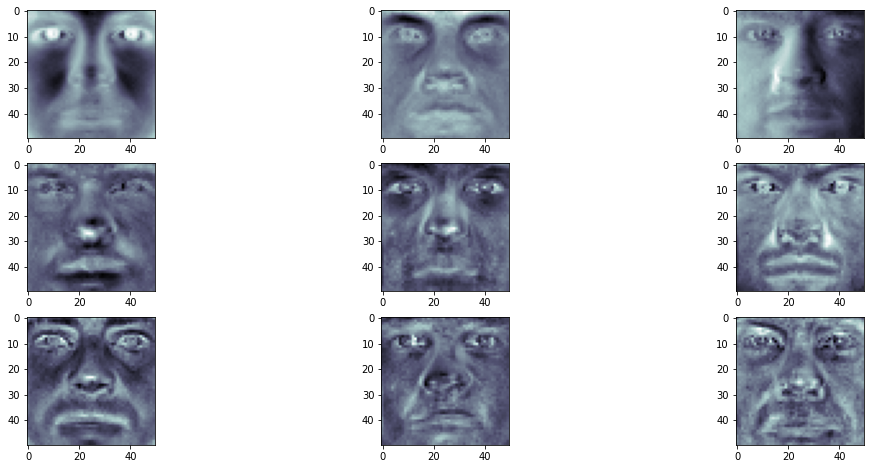

In [ ]:
label, image_data = loadImages(path,"Set_1")
U, s, VT = np.linalg.svd(image_data.transpose())

plt.figure(figsize=(18, 8))
for i in range(0,9,1):
  plt.subplot(3, 3, i+1)
  plt.imshow(VT[i].reshape(50, 50), cmap='bone')

Ειναι διαφωρετικα Γιατί το eigenvectors περιγράφει τις κατευθύνσεις του νέου χώρου χαρακτηριστικών ενώ τa singular vectors του αρχικού χώρου χαρακτηριστικών